In [18]:
options(warn=-1)#test the geo distance matrix, added in the function files
#weighted cluster method
library('data.table')
library('ggplot2')
library('ggmap')
library('dbscan')
library('dplyr')
funPath='D:/Git/Rprojects/ECA/function.R'
source(funPath)

In [2]:
terminals=fread('d:/Git/data/terminals.csv')
t3=fread('d:/Git/data/t3.csv')
t3=t3[,max:=NULL]
t3=t3[,V1:=NULL]
terminals=terminals[,V1:=NULL]
dim(t3);dim(terminals)
#hist(t3$sd,breaks=100);
#hist(log(log(t3$tripRate)),breaks=100)
#head(t3)
#head(terminals)
terminals[fcid==38]

[1] 2350    8

[1] 11750    13

fcid mmsi      atime               time       status sog lon      lat     
1 38   372813000 2015-05-04 19:40:00 1430738753 5      0   103.7388 1.238300
2 38   372813000 2015-05-04 18:40:00 1430734929 5      0   103.7388 1.238300
3 38   372813000 2015-05-04 15:40:00 1430725068 5      0   103.7388 1.238300
4 38   372813000 2015-05-04 13:40:00 1430717862 5      0   103.7388 1.238400
5 38   372813000 2015-05-04 17:20:00 1430730530 5      0   103.7388 1.238388
  glon  glat c  c1 cid
1 103.5 1    37 1  38 
2 103.5 1    37 1  38 
3 103.5 1    37 1  38 
4 103.5 1    37 1  38 
5 103.5 1    37 1  38

In [3]:
#convert the csv document to esri shp documents
library(data.table)
library(rgdal)
library('sp')
MyData <- fread(file="D:/Git/data/terminals.csv")
coordinates(MyData)<-~lon+lat # whatever the equivalent is in your 
writeOGR(MyData, "D:/Git/data/terminals.shp", "layer name", driver = "ESRI Shapefile")

Loading required package: sp
rgdal: version: 1.2-5, (SVN revision 648)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.0.1, released 2015/09/15
 Path to GDAL shared files: C:/Users/wzh/Documents/R/win-library/3.3/rgdal/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.2, 08 September 2015, [PJ_VERSION: 492]
 Path to PROJ.4 shared files: C:/Users/wzh/Documents/R/win-library/3.3/rgdal/proj
 Linking to sp version: 1.2-4 


In [3]:
#join terminals with t3
t3[fcid==2019];terminals[1];
dt=data.table(left_join(terminals,t3,'fcid'))

fcid uniques mean     median   sd       N  norm      tripRate
1 2019 12      14.40352 13.57542 9.960222 16 0.0574934 1.333333

fcid mmsi      atime               time       status sog lon      lat     
1 1    566127000 2015-12-26 16:40:00 1451118077 5      0   103.8335 1.267445
  glon  glat c c1 cid
1 103.5 1    1 36 1

In [4]:
#calculate trips between two ports
#setkey(terminals,mmsi,fcid,cid,c1)
links=terminals[,list(time=.SD[1]$time,atime=.SD[1]$atime,.N),list(mmsi,fcid,cid,c1)];setkey(links,mmsi,time,fcid)#get time and #points of each trip
setkey(links,mmsi,time,c1)

In [20]:
t4=t3[(N>100&norm<0.45)|tripRate>=1.5&uniques>=3&norm<0.25&N>15&mean<72]
#t4=t3[tripRate>=1.5&uniques<6&norm<0.25&N>15&mean<72]
selected=terminals[fcid%in%t4$fcid]
t5=data.table(anti_join(t3,t4[,list(fcid)],'fcid'))
#write.csv(t5,'C:/Users/wzh/Dropbox/data/unselected.csv')

In [ ]:
#get google pictures for each candidate container terminals
options(warn=-1)
zoomSize=16
#nrow(tc)
for (i in seq(1,1)){
    print(i)
    r=t5[i]
    temp=terminals[fcid==r$fcid];nrow(temp)
    centerX=0.5*(max(temp$lon)+min(temp$lon))
    centerY=0.5*(max(temp$lat)+min(temp$lat))
    p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))
    p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(fcid)),size=0.5,alpha=0.75)
    p=p+geom_text(data=temp[,.SD[1],fcid],nudge_x = 0.005,nudge_y = 0.005,aes(x=lon,y=lat,label=paste(glon,glat,fcid)),color='black',size=4)
    p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.1,0.3))
    
    #p
    hulls=temp[chull(temp[,list(lon,lat)]),]
    p=p+geom_point(data = hulls, aes(x = lon, y = lat),size=1,col='yellow') 
    p=p+geom_polygon(data = hulls, aes(x = lon, y = lat),fill='yellow',alpha = 0.4)
    #plot(p)
    ggsave(paste('D:/Git/data/portClusterPictures/unselected/',paste(r$glon,r$glat,r$fcid),'.png',sep=''))
}


[1] 15

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=30.988601,120.567375&zoom=8&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false


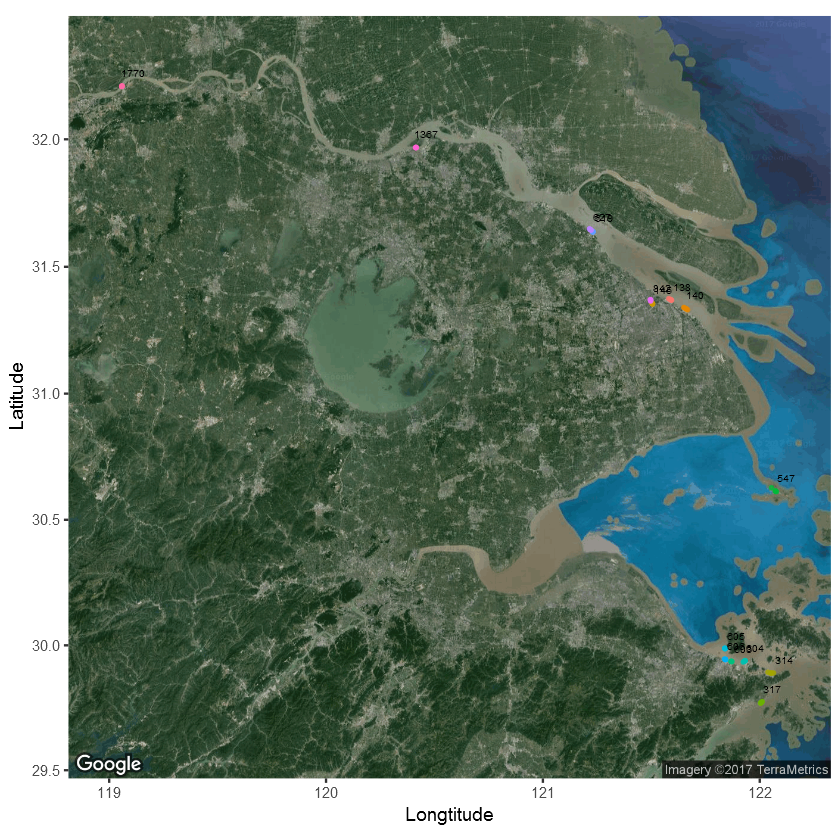

In [19]:
    zoomSize=8
    #temp=terminals;nrow(temp)
    temp=selected[lon<122.5&lon>119&lat>29&lat<32.5];nrow(temp[,.N,fcid])
    #t3[fcid%in%temp[,.N,fcid]$fcid]
    #temp=terminals[lon<0&lon>-180];nrow(temp)
    centerX=0.5*(max(temp$lon)+min(temp$lon))
    centerY=0.5*(max(temp$lat)+min(temp$lat))
    p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))
    p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(fcid)),size=0.5,alpha=0.75)
    p=p+geom_text(data=temp[,.SD[1],fcid],nudge_x = 0.05,nudge_y = 0.05,aes(x=lon,y=lat,label=fcid),color='black',size=2)
    p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position='none')
    #p
    #hulls=temp[chull(temp[,list(lon,lat)]),]
    #p=p+geom_point(data = hulls, aes(x = lon, y = lat),size=1,col='yellow') 
    #p=p+geom_polygon(data = hulls, aes(x = lon, y = lat),fill='yellow',alpha = 0.4)
    plot(p)
    #ggsave(paste('D:/Git/data/portClusterPictures/','h','.png',sep=''))

[1] 43215

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=11.406553,89.225195&zoom=2&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Saving 6.67 x 6.67 in image


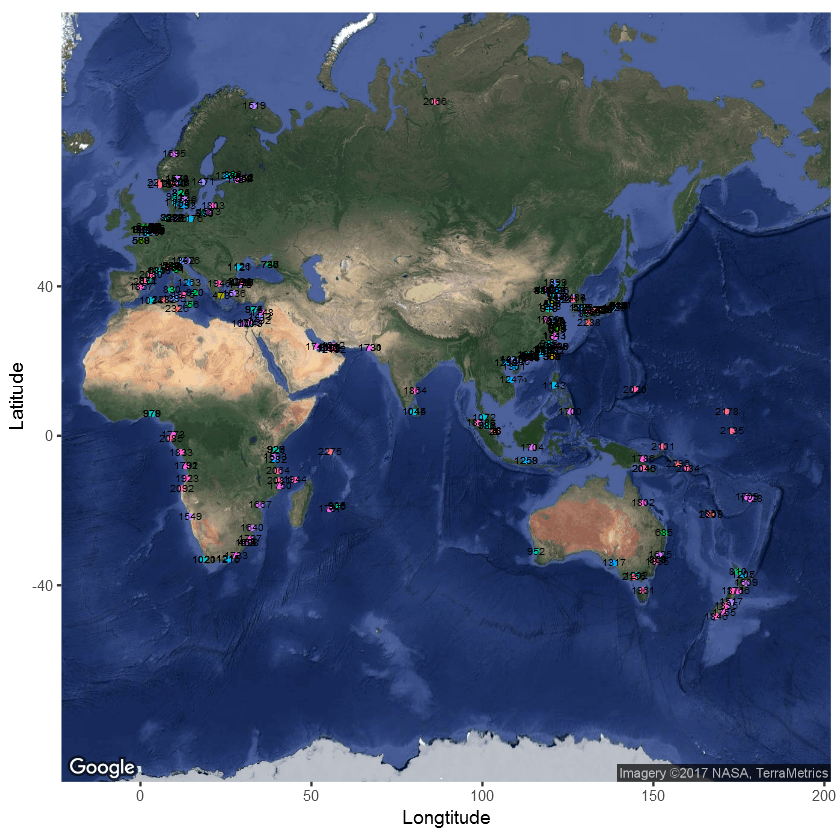

In [210]:
    zoomSize=2
    #temp=terminals;nrow(temp)
    #temp=terminals[lon<124&lon>105&lat>19&lat<41];nrow(temp)
    temp=selected[lon<180&lon>0];nrow(temp)
    centerX=0.5*(max(temp$lon)+min(temp$lon))
    centerY=0.5*(max(temp$lat)+min(temp$lat))
    p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))
    p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(fcid)),size=0.5,alpha=0.75)
    p=p+geom_text(data=temp[,.SD[1],fcid],nudge_x = 0.05,nudge_y = 0.05,aes(x=lon,y=lat,label=fcid),color='black',size=2)
    p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position='none')
    #p
    #hulls=temp[chull(temp[,list(lon,lat)]),]
    #p=p+geom_point(data = hulls, aes(x = lon, y = lat),size=1,col='yellow') 
    #p=p+geom_polygon(data = hulls, aes(x = lon, y = lat),fill='yellow',alpha = 0.4)
    plot(p)
    ggsave(paste('D:/Git/data/portClusterPictures/','h','.png',sep=''))

[1] 13207

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=5.614777,-87.687049&zoom=2&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false


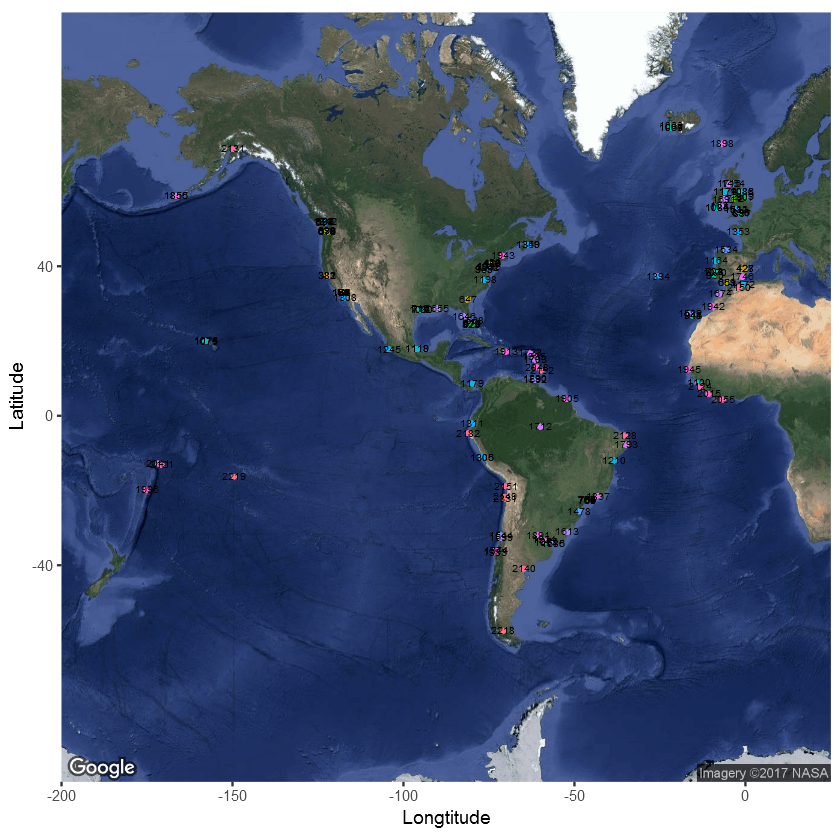

In [211]:
    zoomSize=2
    #temp=terminals;nrow(temp)
    #temp=terminals[lon<124&lon>105&lat>19&lat<41];nrow(temp)
    temp=selected[lon<(-0)&lon>(-180)];nrow(temp)
    #temp=selected[lon<(-121)&lon>(-124)&lat>45&lat<50];nrow(temp)
    centerX=0.5*(max(temp$lon)+min(temp$lon))
    centerY=0.5*(max(temp$lat)+min(temp$lat))
    p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))
    p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(fcid)),size=0.5,alpha=0.75)
    p=p+geom_text(data=temp[,.SD[1],fcid],nudge_x = 0.05,nudge_y = 0.05,aes(x=lon,y=lat,label=fcid),color='black',size=2)
    p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position='none')
    #p
    #hulls=temp[chull(temp[,list(lon,lat)]),]
    #p=p+geom_point(data = hulls, aes(x = lon, y = lat),size=1,col='yellow') 
    #p=p+geom_polygon(data = hulls, aes(x = lon, y = lat),fill='yellow',alpha = 0.4)
    plot(p)
    #ggsave(paste('D:/Git/data/portClusterPictures/','h','.png',sep=''))

[1] 30

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.425725,-122.379902&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false


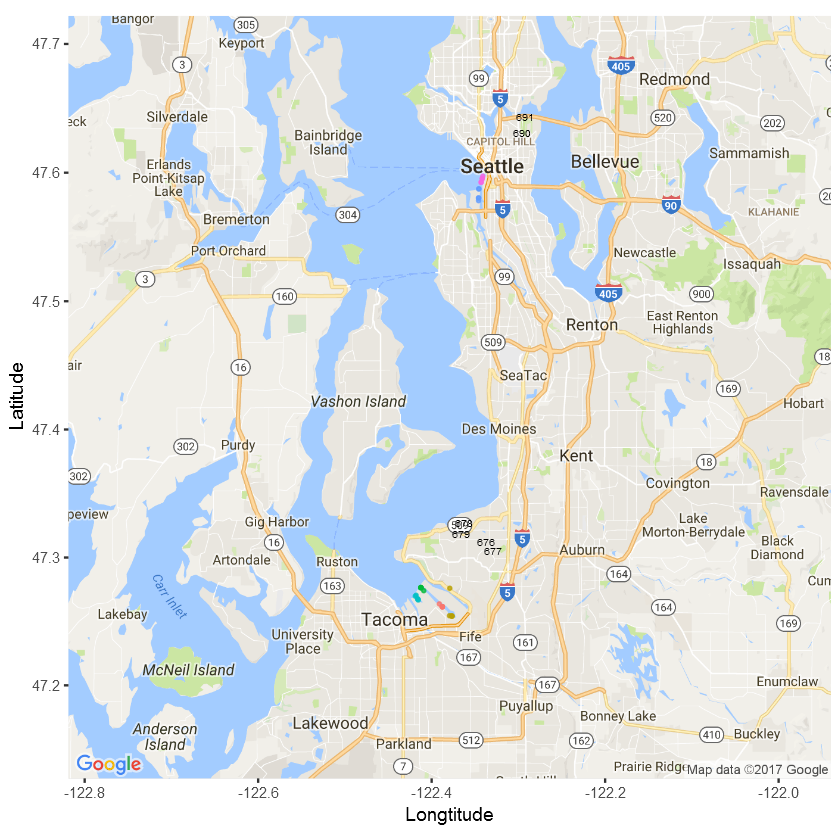

In [12]:
 zoomSize=10
    #temp=terminals;nrow(temp)
    #temp=terminals[lon<124&lon>105&lat>19&lat<41];nrow(temp)
    #temp=selected[lon<(-0)&lon>(-180)];nrow(temp)
    temp=selected[lon<(-122)&lon>(-123)&lat>47&lat<48];nrow(temp)
    centerX=0.5*(max(temp$lon)+min(temp$lon))
    centerY=0.5*(max(temp$lat)+min(temp$lat))
    p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'roadmap'))
    p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(fcid)),size=0.5,alpha=0.75)
    p=p+geom_text(data=temp[,.SD[1],fcid],nudge_x = 0.05,nudge_y = 0.05,aes(x=lon,y=lat,label=fcid),color='black',size=2)
    p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position='none')
    #p
    #hulls=temp[chull(temp[,list(lon,lat)]),]
    #p=p+geom_point(data = hulls, aes(x = lon, y = lat),size=1,col='yellow') 
    #p=p+geom_polygon(data = hulls, aes(x = lon, y = lat),fill='yellow',alpha = 0.4)
    plot(p)
    #ggsave(past

In [32]:
#train SVM
d0=fread('C:/Users/wzh/Dropbox/data/terminals_labelled.csv');
d0=d0[uniques>1&N>4];head(d0);dim(d0);setkey(d0,fcid)

label fcid uniques mean      median    sd        N  norm      tripRate
1 1      5   70      12.709487 11.427361  7.811558 98 0.1008794 1.400000
2 0      7   17      20.854344  7.500000 40.285544 72 0.6403627 4.235294
3 0      8    5      33.797407 19.049722 33.997738 15 0.4363555 3.000000
4 0      9    6       7.713571  6.999167  3.564350  7 0.0926166 1.166667
5 0     10    4       8.463636  5.249722  6.954237 11 0.3797321 2.750000
6 0     11    5      27.842460 12.156111 33.456828  7 0.5633967 1.400000

[1] 1070    9

In [34]:
nrow(d0[label==1])

[1] 710